Data Sources
- yield: https://www.kaggle.com/andradaolteanu/is-a-recession-coming-us-yield-curves-can-tell-us/data
- interest rates: https://www.kaggle.com/federalreserve/interest-rates

# Project
### Take some data you worked with in an earlier part of the course. What did you learn from it? Make one or more visualizations to present your insights. Structure your argument as as a presentation

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

In [277]:
df_yield = pd.read_csv("data_yield_curve.csv")
df_yield.head()

,Date,1 yr,30YR,SPREAD,SP500,GOLD,OIL,CHHUSD,JPYUSD
0,1977-03-01,5.50,7.80,2.30,0.0,148.34,0.0,2.55,280.23
1,1977-04-01,5.44,7.73,2.29,0.0,149.18,0.0,2.53,275.21
2,1977-05-01,5.84,7.80,1.95,0.0,146.54,0.0,2.52,277.43
3,1977-06-01,5.80,7.64,1.84,0.0,140.83,0.0,2.49,272.86
4,1977-07-01,5.94,7.64,1.71,0.0,143.40,0.0,2.41,264.86


In [278]:
#check if any missing data
df_yield.isna().values.any()

False

In [279]:
#rename CHHUSD in CHFUSD
df_yield.rename(columns = {'CHHUSD':'CHFUSD'}, inplace = True)

In [280]:
#add a column year
df_yield['Year'] = df_yield['Date'].apply(lambda i: i.split('-')[0]).astype(int)

In [281]:
df_yield

,Date,1 yr,30YR,SPREAD,SP500,GOLD,OIL,CHFUSD,JPYUSD,Year
0,1977-03-01,5.50,7.80,2.30,0.00,148.34,0.00,2.55,280.23,1977
1,1977-04-01,5.44,7.73,2.29,0.00,149.18,0.00,2.53,275.21,1977
2,1977-05-01,5.84,7.80,1.95,0.00,146.54,0.00,2.52,277.43,1977
3,1977-06-01,5.80,7.64,1.84,0.00,140.83,0.00,2.49,272.86,1977
4,1977-07-01,5.94,7.64,1.71,0.00,143.40,0.00,2.41,264.86,1977
...,...,...,...,...,...,...,...,...,...,...
506,2019-05-01,2.34,2.82,0.48,2752.06,1283.10,60.83,1.01,109.97,2019
507,2019-06-01,2.00,2.57,0.58,2941.76,1358.49,54.66,0.99,108.07,2019
508,2019-07-01,1.96,2.57,0.61,0.00,1414.61,57.35,0.99,108.29,2019
509,2019-08-01,1.77,2.12,0.35,0.00,1497.10,54.81,0.98,106.19,2019


In [282]:
#import inverted data
df_inverted = pd.read_csv("yield_curve_inverted.csv")

In [283]:
df_inverted

,Maturities,23.08.2019,23.08.2018
0,1 Mo,2.07,1.94
1,2 Mo,2.02,2.00
2,3 Mo,1.97,2.08
3,6 Mo,1.87,2.23
4,1 Yr,1.73,2.43
5,2 Yr,1.51,2.61
6,3 Yr,1.43,2.66
7,5 Yr,1.40,2.72
8,7 Yr,1.46,2.78
9,10 Yr,1.52,2.82


In [284]:
# Yield Curve Inverted
df = pd.melt(df_inverted, id_vars='Maturities', value_vars=['23.08.2019', '23.08.2018'], var_name='Dates')

In [285]:
df

,Maturities,Dates,value
0,1 Mo,23.08.2019,2.07
1,2 Mo,23.08.2019,2.02
2,3 Mo,23.08.2019,1.97
3,6 Mo,23.08.2019,1.87
4,1 Yr,23.08.2019,1.73
5,2 Yr,23.08.2019,1.51
6,3 Yr,23.08.2019,1.43
7,5 Yr,23.08.2019,1.40
8,7 Yr,23.08.2019,1.46
9,10 Yr,23.08.2019,1.52


In [286]:
# visuals setup
sns.set(style = 'whitegrid')

palette = sns.color_palette("Set2")
sns.set_palette(palette)

In [287]:
#plt.figure(figsize=(16,4))
#
#ax1 = sns.lineplot(x = 'Maturities', y = 'value', hue = 'Dates', data = df, lw = 3, err_style=None,
#                  legend = 'full', size_order=['1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr',
#       '7 Yr', '10 Yr', '20 Yr', '30 Yr'], sort = False)
#
#
#plt.legend(['23.08.2019', '23.08.2018'])
#plt.title('Yield Curve Maturities in 23.08 - 2018 and 2019', fontsize = 17)
#plt.xlabel('Maturities', fontsize = 15)
#plt.ylabel('Yield', fontsize = 15)

The yield is the amount of money that the U.S Treasury will pay to borrow money. 
Maturity is the amount of time the bond is valid for.

Typically, the longer you borrow money the more you can expect to be paid in return (a higher yield). Historically when approaching a recession, investors are less willing to lend their money to the government and therefore the demand for short term bonds increases as the demand for long term bonds decreases.

In [288]:
#plt.figure(figsize=(16,4))
#
#ax1 = sns.lineplot(x = 'Year', y = '1 yr', data=df_yield, err_style=None, lw = 3, estimator='mean')
#ax2 = sns.lineplot(x = 'Year', y = '30YR', data=df_yield, err_style=None, lw = 3, estimator='mean')
#
#plt.title('Yield values for 1 and 30 years maturity - from 1977 to 2019', fontsize = 17)
#plt.xlabel('Year', fontsize = 15)
#plt.ylabel('Yield value(%)', fontsize = 15)
#plt.legend(['1yr','30yrs'], ncol=2, loc='upper right', fontsize = 13)
#
#ax1.set_xlim(1977,2020)

By plotting short term bonds (1 year) versus long term bonds (30 years) over a large period of time we can observe when short term bonds move below long term bonds yields.

In [289]:
#import fed funds rate
df_int = pd.read_csv('interest_rates.csv')
df_int

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN
...,...,...,...,...,...,...,...,...,...,...
899,2016,12,14,NaN,0.75,0.50,NaN,NaN,NaN,NaN
900,2017,1,1,NaN,0.75,0.50,0.65,NaN,4.8,2.3
901,2017,2,1,NaN,0.75,0.50,0.66,NaN,4.7,2.2
902,2017,3,1,NaN,0.75,0.50,NaN,NaN,NaN,NaN


In [290]:
#import fed funds rate
df_int = pd.read_csv('FRB_H15.csv')
df_int

,Series Description,Federal funds effective rate
0,Unit:,Percent:_Per_Year
1,Multiplier:,1
2,Currency:,NaN
3,Unique Identifier:,H15/H15/RIFSPFF_N.M
4,Time Period,RIFSPFF_N.M
...,...,...
785,2019-07,2.40
786,2019-08,2.13
787,2019-09,2.04
788,2019-10,1.83


In [291]:
#remove first 6 rows
df_int = pd.DataFrame(df_int.iloc[6:])

In [292]:
#check for missing values
df_int.isna().values.any()

False

In [293]:
df_int = df_int.rename(columns={'Series Description': 'Date'})

In [294]:
df_int.dtypes

Date                            object
Federal funds effective rate    object
dtype: object

In [295]:
#convert Date to datetime
df_int['Date'] =  pd.to_datetime(df_int['Date'], infer_datetime_format=True)
#df_int['Date'] =  pd.to_datetime(df_int['Date'], format='%Y-%m') #alternative method

df_int['Federal funds effective rate'] = df_int['Federal funds effective rate'].astype(float)

In [296]:
df_int

,Date,Federal funds effective rate
6,1954-08-01,1.22
7,1954-09-01,1.06
8,1954-10-01,0.85
9,1954-11-01,0.83
10,1954-12-01,1.28
...,...,...
785,2019-07-01,2.40
786,2019-08-01,2.13
787,2019-09-01,2.04
788,2019-10-01,1.83


In [297]:
df_int.dtypes

Date                            datetime64[ns]
Federal funds effective rate           float64
dtype: object

In [298]:
df_yield['Date'] =  pd.to_datetime(df_yield['Date'], infer_datetime_format=True)

In [299]:
#test
df_int['Date'] = pd.to_datetime(df_int['Date']).dt.strftime('%Y-%m')
df_yield['Date'] = pd.to_datetime(df_yield['Date']).dt.strftime('%Y-%m')

In [300]:
df_yield

,Date,1 yr,30YR,SPREAD,SP500,GOLD,OIL,CHFUSD,JPYUSD,Year
0,1977-03,5.50,7.80,2.30,0.00,148.34,0.00,2.55,280.23,1977
1,1977-04,5.44,7.73,2.29,0.00,149.18,0.00,2.53,275.21,1977
2,1977-05,5.84,7.80,1.95,0.00,146.54,0.00,2.52,277.43,1977
3,1977-06,5.80,7.64,1.84,0.00,140.83,0.00,2.49,272.86,1977
4,1977-07,5.94,7.64,1.71,0.00,143.40,0.00,2.41,264.86,1977
...,...,...,...,...,...,...,...,...,...,...
506,2019-05,2.34,2.82,0.48,2752.06,1283.10,60.83,1.01,109.97,2019
507,2019-06,2.00,2.57,0.58,2941.76,1358.49,54.66,0.99,108.07,2019
508,2019-07,1.96,2.57,0.61,0.00,1414.61,57.35,0.99,108.29,2019
509,2019-08,1.77,2.12,0.35,0.00,1497.10,54.81,0.98,106.19,2019


(1977, 2020)

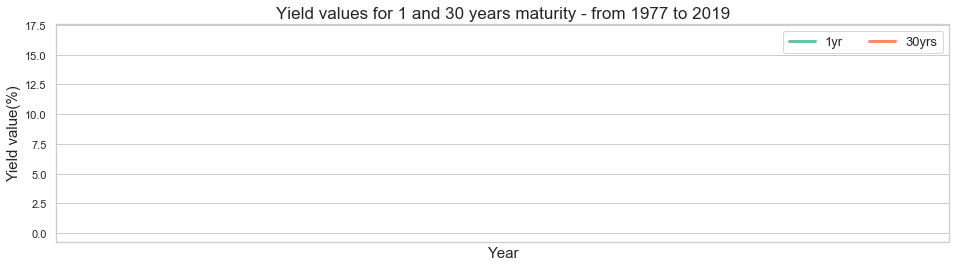

In [301]:
plt.figure(figsize=(16,4))

ax1 = sns.lineplot(x = 'Date', y = '1 yr', data=df_yield, err_style=None, lw = 3, estimator='mean')
ax2 = sns.lineplot(x = 'Date', y = '30YR', data=df_yield, err_style=None, lw = 3, estimator='mean')
#ax3 = sns.lineplot(x = 'Date', y = 'Federal funds effective rate', 
                   #data=df_int, err_style=None, lw = 3, estimator='mean')

plt.title('Yield values for 1 and 30 years maturity - from 1977 to 2019', fontsize = 17)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Yield value(%)', fontsize = 15)
plt.legend(['1yr','30yrs'], ncol=2, loc='upper right', fontsize = 13)

ax1.set_xlim(1977,2020)

In [ ]:
sns.tsplot(data=df, time="date", unit="country",
           condition="Income Level", value="HIV Rate")
plt.show()